   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   206  CASH_OUT    62927.08   C473782114           0.00            0.00   
1   380   PAYMENT    32851.57  C1915112886           0.00            0.00   
2   570  CASH_OUT  1131750.38  C1396198422     1131750.38            0.00   
3   184  CASH_OUT    60519.74   C982551468       60519.74            0.00   
4   162   CASH_IN    46716.01  C1759889425     7668050.60      7714766.61   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isPayment  \
0  C2096898696       649420.67       712347.75        0          0   
1   M916879292            0.00            0.00        0          1   
2  C1612235515       313070.53      1444820.92        1          0   
3  C1378644910        54295.32       182654.50        1          0   
4  C2059152908      2125468.75      2078752.75        0          0   

   isMovement  accountDiff  
0           1    649420.67  
1           0         0.00  
2           1    818679.85  


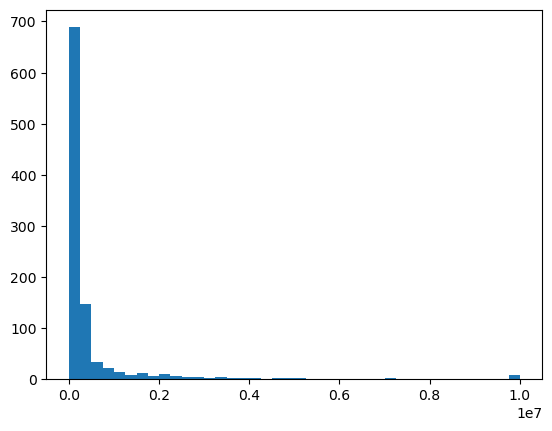

0    0
1    1
2    0
3    0
4    0
Name: isPayment, dtype: int64
0    1
1    0
2    1
3    1
4    0
Name: isMovement, dtype: int64
0.8557142857142858
0.8066666666666666
[[ 2.70232567 -0.63589389  2.03784319 -1.1995272 ]]
[0 0 0 0]
[[0.62400894 0.37599106]
 [0.99801114 0.00198886]
 [0.99617873 0.00382127]
 [0.64068931 0.35931069]]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

In [1]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
transactions = pd.read_csv('transactions_modified.csv')
print(transactions.head())
print(transactions.info())
print(transactions.columns)


# How many fraudulent transactions?
print("isFraud counts:")
print(transactions.isFraud.value_counts())
# Summary statistics on amount column
print(transactions.amount.describe())
plt.hist(transactions.amount, bins=40)
plt.show()
plt.clf()

# Create isPayment field
#transactions['isPayment'] = 0
#transactions['isPayment'][transactions['type'].isin(['PAYMENT','DEBIT'])] = 1
transactions['isPayment'] = transactions.type.apply(lambda x: 1 if (x in ['PAYMENT','DEBIT']) else 0)
print(transactions.isPayment.head())

# Create isMovement field
#transactions['isMovement'] = 0
#transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1
transactions['isMovement'] = transactions.type.apply(lambda x: 1 if (x in ['CASH_OUT', 'TRANSFER']) else 0)
print(transactions.isMovement.head())


# Create accountDiff field
transactions['accountDiff'] = abs(transactions.oldbalanceOrg - transactions.oldbalanceDest)

# Create features and label variables
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
label = transactions['isFraud']
# Split dataset
X_train, X_test, y_train, y_test =train_test_split(features, label, test_size=0.3)

# Normalize the features variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Score the model on the training data
print(model.score(X_train, y_train))

# Score the model on the test data
print(model.score(X_test, y_test))

# Print the model coefficients
print(model.coef_)

# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

# Create a new transaction
your_transaction = np.array([77733.37, 0.0, 1.0, 17377.7])

# Combine new transactions into a single array
sample_transactions = np.stack((transaction1, transaction2, transaction3, your_transaction))

# Normalize the new transactions
sample_transactions = scaler.transform(sample_transactions)

# Predict fraud on the new transactions
print(model.predict(sample_transactions))

# Show probabilities on the new transactions
print(model.predict_proba(sample_transactions))